# Q6

In [8]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [9]:
def Reflect101(img, filter_size):
    '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
        img (ndarray): input image
        filter_size (ndarray): filter size
    output(s):
        image (ndarray): computed Reflect101
    '''
    image = np.pad(img, (filter_size//2, filter_size//2), 'reflect')
    return image.astype(np.float64)

In [10]:
def Averaging_Blurring(img, filter_size):
    '''
    Do not use libraries
    input(s):
        img (ndarray): input image
        filter_size (ndarray): filter size
    output(s):
        result (ndarray): computed averaging blurring
    '''    
    # Create an empty ndarray with the same shape as the input image
    result = np.zeros(img.shape)
    
    # Apply a reflective padding to the input image
    img = Reflect101(img, filter_size)
    
    # Loop through the image and compute the average of the pixels in each filter window
    for i in range(img.shape[0] - filter_size + 1):
        for j in range(img.shape[1] - filter_size + 1):
            result[i, j] = np.mean(img[i:i+filter_size, j:j+filter_size])
    
    # Return the resulting blurred image
    return result

In [11]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  # Apply a reflective padding to the input image
  image = Reflect101(img, filter_size)
  
  # Create an empty ndarray with the same shape as the input image
  result = np.zeros((img.shape))
  
  # Loop through the image and compute the median of the pixels in each filter window
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i, j] = np.median(image[i:i+filter_size, j:j+filter_size])
  
  # Return the resulting blurred image
  return result

In [12]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    # Create an empty ndarray with the same shape as the input image
    result = np.zeros(img.shape)
    
    # Apply a reflective padding to the input image
    img = Reflect101(img, filter_size)
    
    # Create a Gaussian kernel with the specified size and standard deviation
    kernel = np.zeros((filter_size, filter_size))
    for i in range(filter_size):
        for j in range(filter_size):
            kernel[i, j] = np.exp(-((i-filter_size//2)**2 + (j-filter_size//2)**2)/(2*std**2))
    kernel = kernel / np.sum(kernel)
    
    # Loop through the image and convolve with the Gaussian kernel
    for i in range(img.shape[0] - filter_size + 1):
        for j in range(img.shape[1] - filter_size + 1):
            result[i, j] = np.sum(img[i:i+filter_size, j:j+filter_size] * kernel)
    
    # Return the resulting blurred image
    return result

In [13]:
# Do not change this cell
image = cv2.imread('images/taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

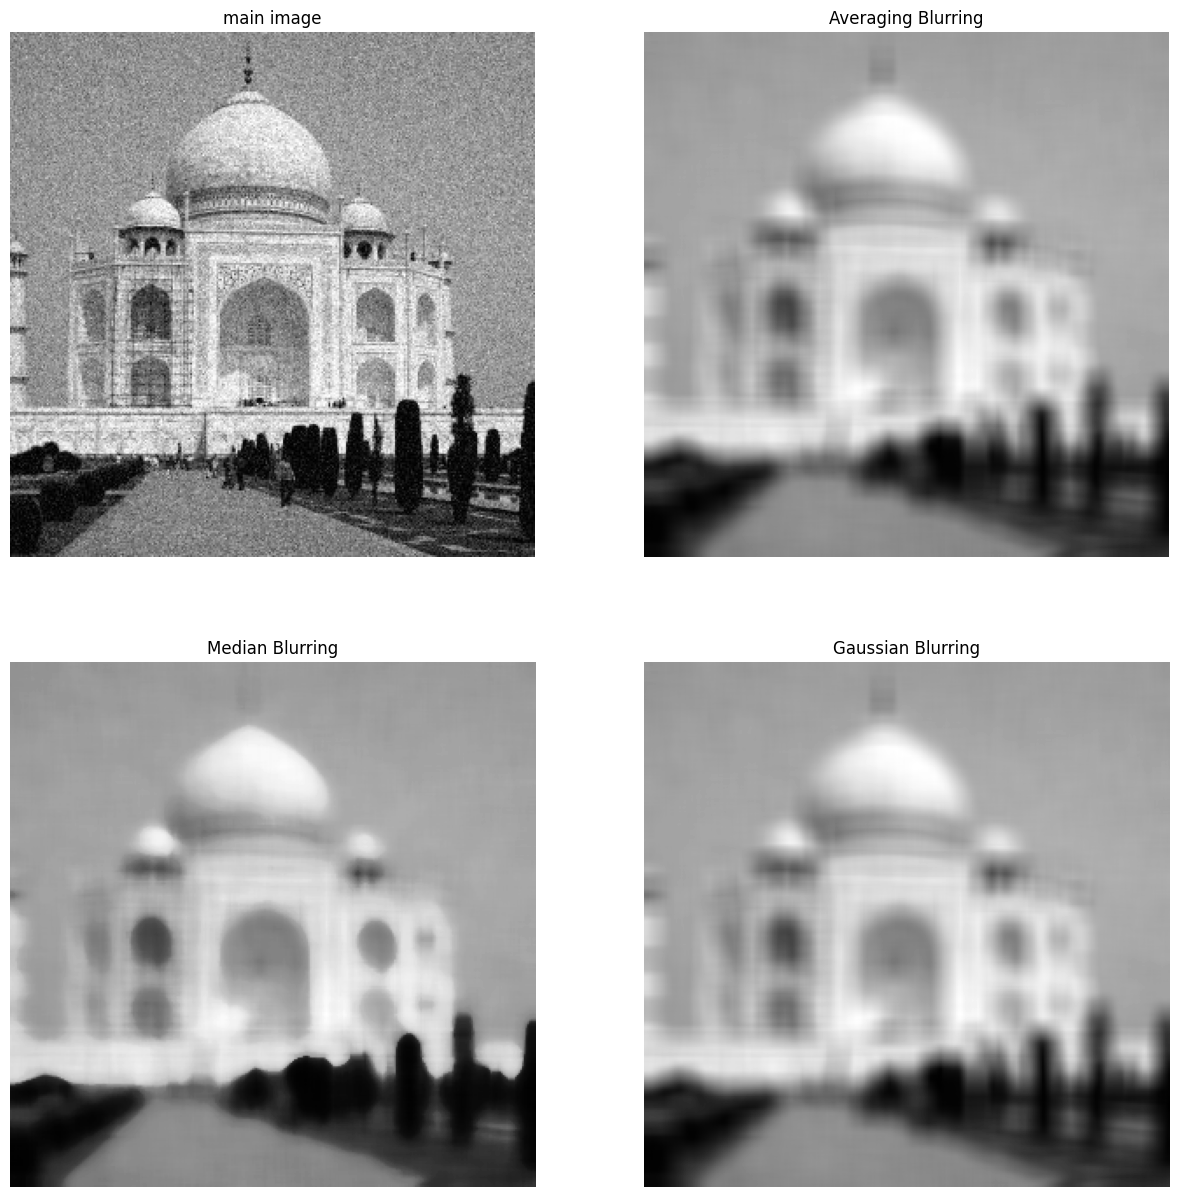

In [14]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [15]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    """
    Applies Bilateral Filter to an input image.

    Args:
        img (ndarray): Input image of shape (H, W, C)
        filter_size (int): Size of the filter (fh, fw)
        std (float): Standard deviation of the Gaussian kernel in the spatial domain
        rstd (float): Standard deviation of the Gaussian kernel in the range (color) domain

    Returns:
        (ndarray): The filtered image of shape (H, W, C).
    """
    # Initialize an empty array to store the filtered image
    result = np.zeros(img.shape)
    # Apply reflect101 padding to the input image
    image = Reflect101(img, filter_size)
    # Iterate over all possible image patches
    for i in range(image.shape[0]-filter_size+1):
        for j in range(image.shape[1]-filter_size+1):
            # Get the current image patch and the center pixel value
            a = image[i:i+filter_size, j:j+filter_size]
            b = image[i+filter_size//2, j+filter_size//2]
            # Compute the kernel weights based on spatial distance and color similarity
            kernel = np.exp(-((a-b)**2)/(2*rstd**2))
            kernel = kernel * np.exp(-((i-filter_size//2)**2 + (j-filter_size//2)**2)/(2*std**2))
            kernel = kernel / np.sum(kernel)
            # Compute the filtered pixel value by taking the weighted sum of all pixels in the patch
            result[i, j] = np.sum(image[i:i+filter_size, j:j+filter_size] * kernel)
    # Return the filtered image
    return result


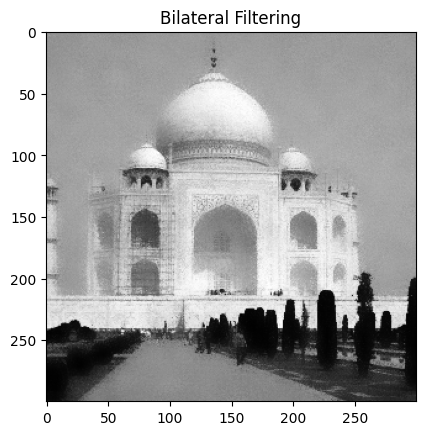

In [16]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
plt.imshow(bilateral,cmap='gray')
plt.title("Bilateral Filtering")
plt.show()

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [27]:
AveragingBlurring = cv2.blur(image,(15,15))
MedianBlurring = cv2.medianBlur(image,15)
GaussianBlurring = cv2.GaussianBlur(image,(15,15),40)
Bilateral = cv2.bilateralFilter(image,15,40,40)

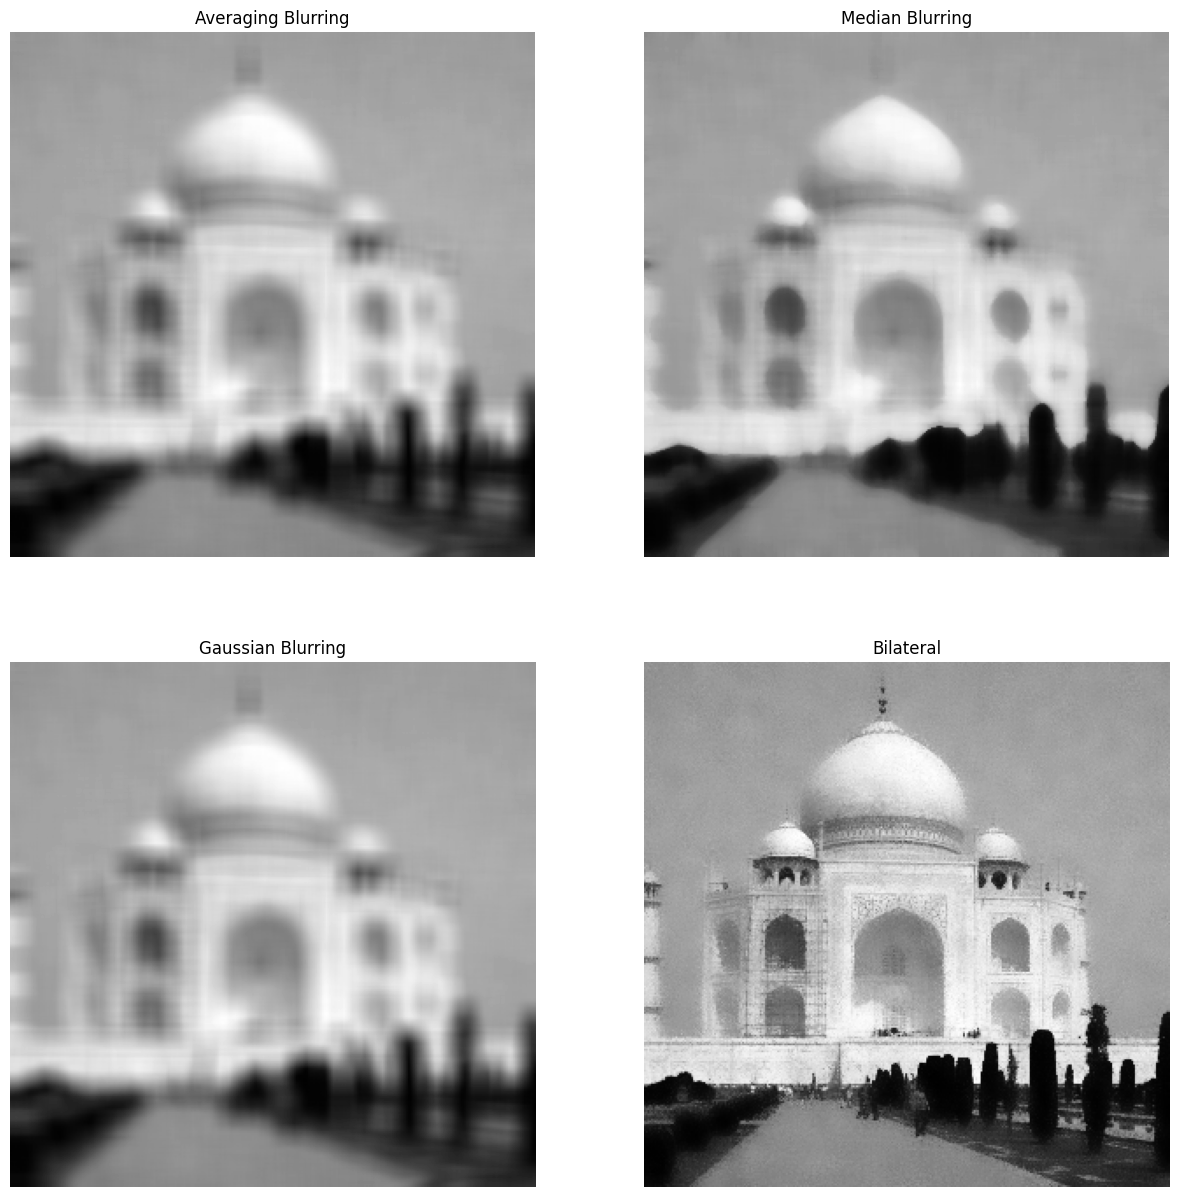

In [28]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")